<a href="https://colab.research.google.com/github/Arka1212/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_(ML_capstone).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **Problem Statement** ==> Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news  because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [397]:
# Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Accessing the dataset.
path = '/content/drive/MyDrive/Capstone Projects/Machine Learning (Regression)/Yes Bank Stock Closing Price Prediction/data_YesBank_StockPrices.csv'
df = pd.read_csv(path)

### **> DATA INSPECTION & PREPROCESSING**

In [413]:
# Glimpse of the dataset.
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [14]:
# Columns.
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

**Date**: It denotes the month & year with respect to the price of the stock.

**Open**: The price at which a stock started trading that month.

**High**: Refers to the maximum price of the stock.

**Low**: Refers to the minimum price of the stock.

**Close**: Refers to the final trading price for that month.

**"Close" is the dependent variable or the target variable in this case & rest all are independent variables or input variables.**

In [9]:
# Shape of the data.
df.shape

# Rows = 185 & Columns = 5.

(185, 5)

In [13]:
# Dataset information.
df.info()

# Dataset has no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [31]:
# Checking for missing values.
df.isna().sum()

# Dataset has no missing values.

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [21]:
# Checking the presence of duplicate data.
len(df[df.duplicated()])

# Dataset has no duplicate data.

0

In [36]:
bank_df = df.copy()

# Created a copy of the data to work with, so as to keep the original dataset intact.

In [37]:
# Changing the "Date" column to datetime object.
bank_df['Date'] = pd.to_datetime(bank_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [40]:
bank_df.info()

# Column is succesfully coverted into datetime object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [49]:
# Description of the dataset.
bank_df.describe()

# Mean & Median values seem a bit deviated from each other in each column which implies that the dataset is skewed.

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [95]:
# Segregating the dataset into dependent & independent variable.
X = bank_df.drop(['Close','Date'],axis=1)         # Independent variables.
Y = bank_df['Close']                              # Dependent variable.

### **> EXPLORATORY DATA ANALYSIS (EDA)**

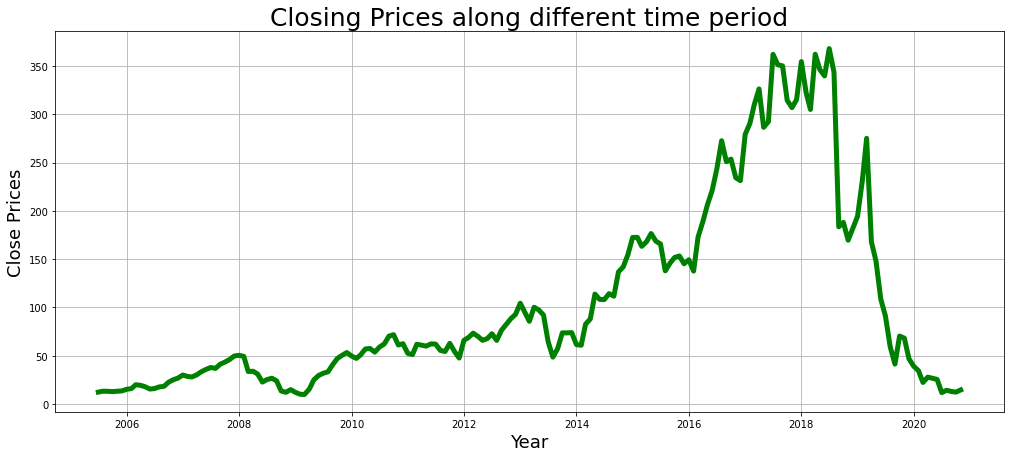

In [238]:
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(17,7))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(bank_df['Date'], bank_df['Close'],linewidth=5,color='green')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()

# 2018 onwards the closing stock prices have witnessed a downfall and the reason can be the fraud case.

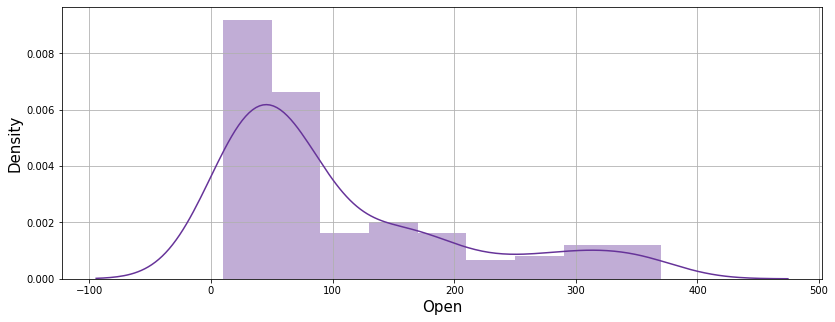

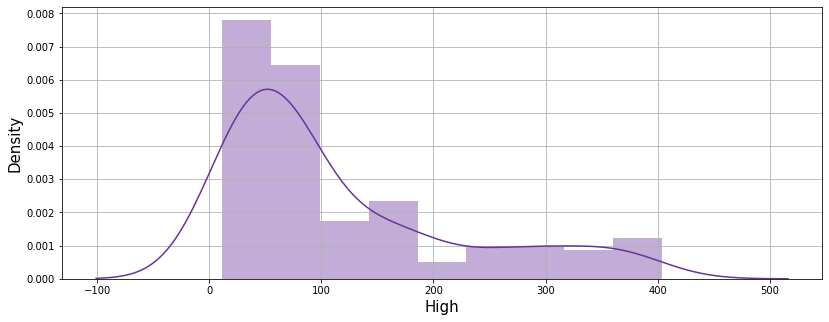

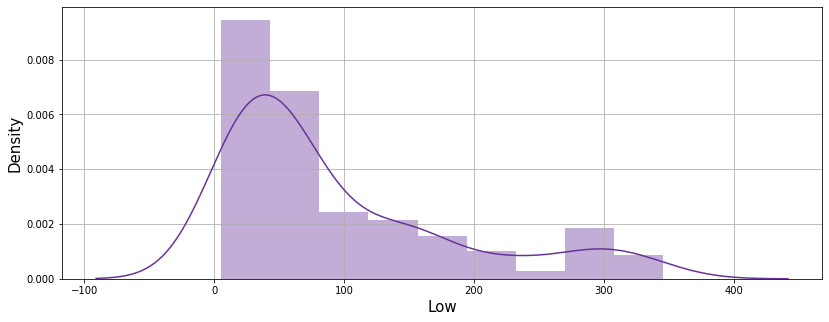

In [136]:
# Visualisation of skewness of the independent variable dataset.
for labels in X:
    plt.figure(figsize=(30,5))
    plt.subplot(1,2,2)
    fig = sns.distplot(bank_df[labels],color='rebeccapurple')
    fig.set_ylabel('Density',fontsize=15)
    fig.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

# The independent variable dataset looks positively skewed.

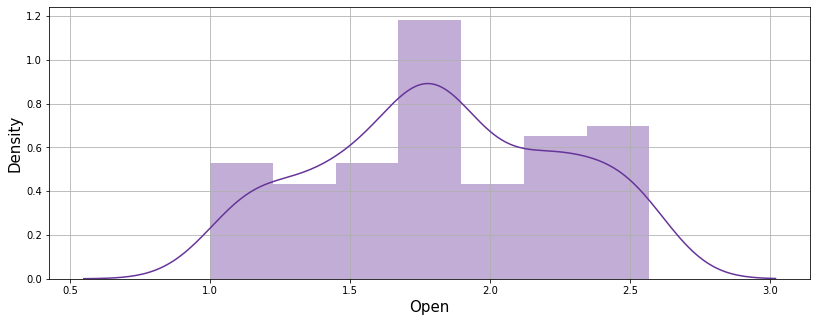

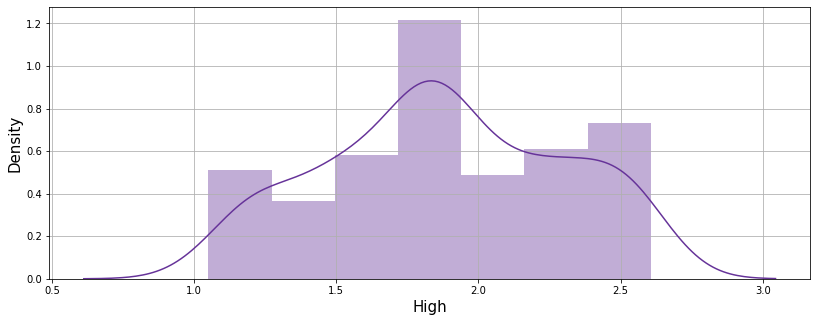

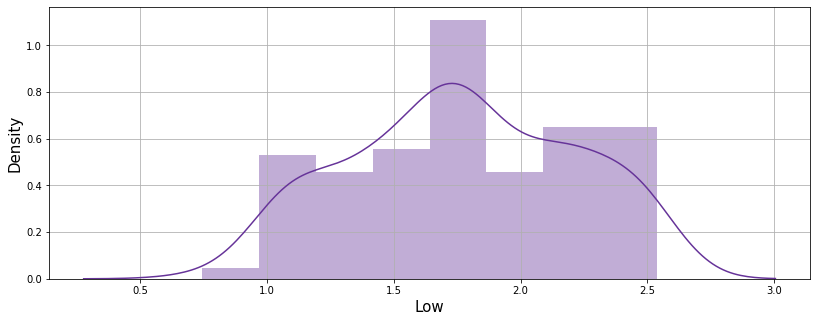

In [138]:
# Applying log tranformation on independent variable dataset.
for labels in X:
    plt.figure(figsize=(30,5))
    plt.subplot(1,2,2)
    vis = sns.distplot(np.log10(bank_df[labels]),color='rebeccapurple')
    vis.set_ylabel('Density',fontsize=15)
    vis.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

# Independent variable dataset now seems to be normally dirtributed a bit after log transformation.

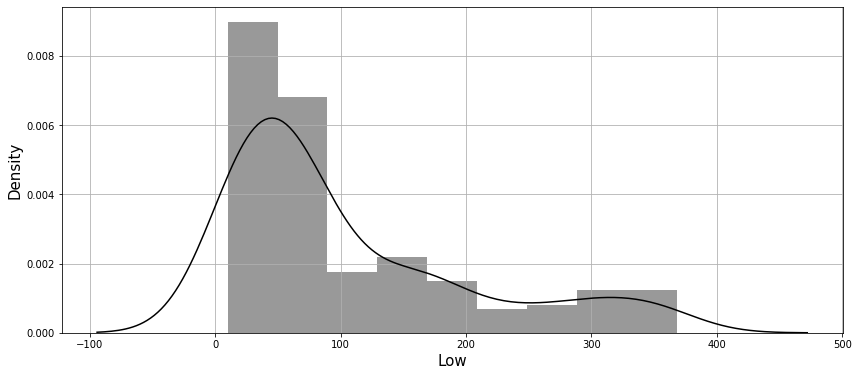

In [98]:
# Visualisation of skewness of the dependent variable dataset.
plt.figure(figsize=(14,6))
vis = sns.distplot(Y,color='black')
vis.set_ylabel('Density',fontsize=15)
vis.set_xlabel(labels,fontsize=15)
plt.grid()
plt.show()

# Dependent variable dataset also looks positively skewed.

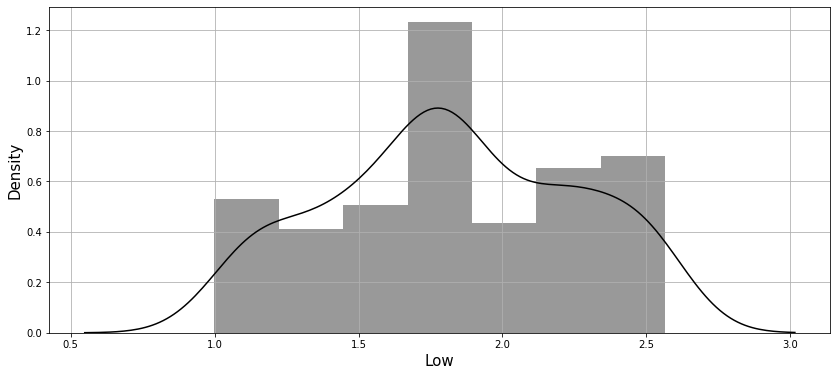

In [99]:
# Applying log tranformation on dependent variable dataset.
plt.figure(figsize=(14,6))
vis = sns.distplot(np.log10(Y),color='black')
vis.set_ylabel('Density',fontsize=15)
vis.set_xlabel(labels,fontsize=15)
plt.grid()
plt.show()

# Dependent variable dataset now seems to be normally dirtributed a bit after log transformation.

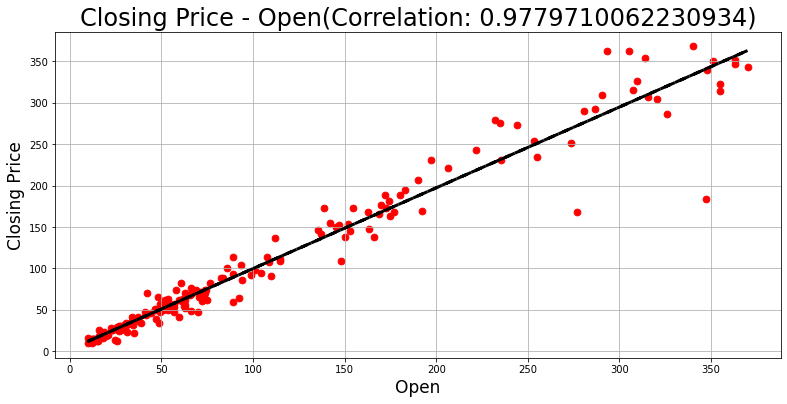

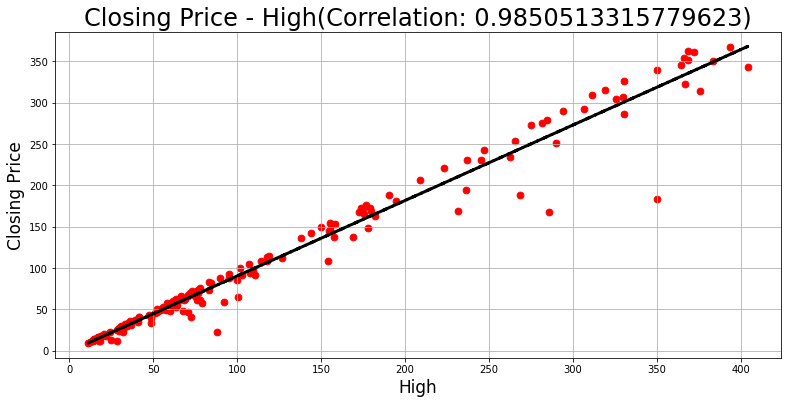

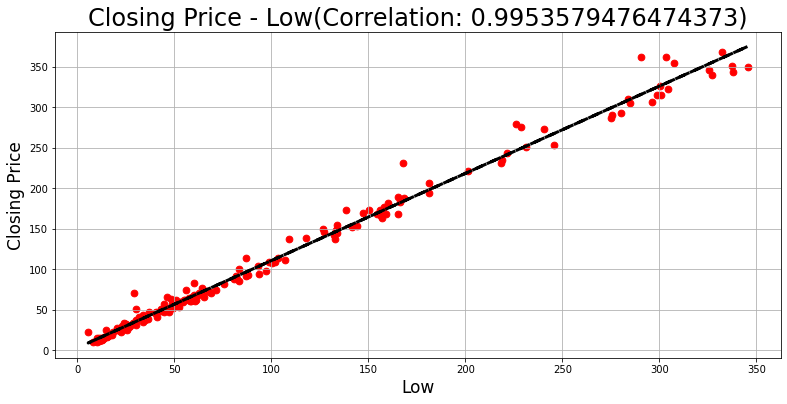

In [152]:
# Bivariate analysis.
for labels in X:
   fig = plt.figure(figsize=(13,6))
   ax = fig.gca()
   feature = bank_df[labels]
   label = bank_df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label,s=45,color='r')
   plt.xlabel(labels,fontsize=17)
   plt.ylabel('Closing Price',fontsize=17)
   ax.set_title('Closing Price - ' + labels + '(' + 'Correlation: ' + str(correlation) + ')',fontsize=24)
   z = np.polyfit(bank_df[labels], bank_df['Close'], 1)
   y_hat = np.poly1d(z)(bank_df[labels])
 
   plt.plot(bank_df[labels], y_hat, "r--", lw=3,color = 'black')
   plt.grid()


plt.show()

# Each of the independent variable is highly correlated to the dependent variable.

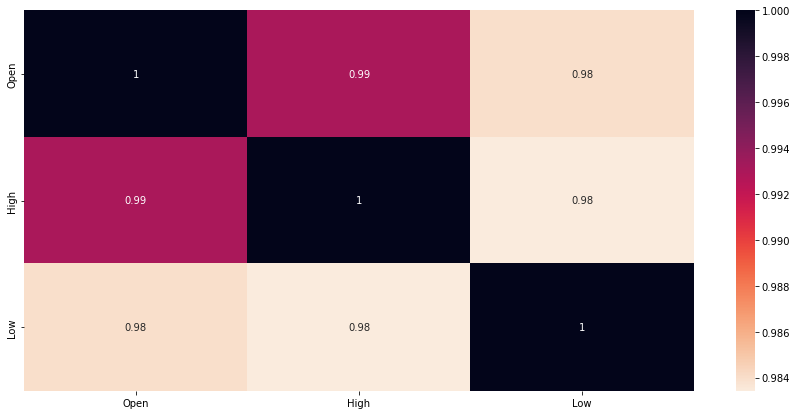

In [163]:
# Correlation among independent variables.
plt.figure(figsize=(15,7))
sns.heatmap(X.corr(),  annot=True, cmap="rocket_r")
plt.show()

# All the variables are highly correlated to each other.

In [166]:
# Multicollinearity detection.
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["Variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

calc_vif(X)

# VIF scores are high so it implies that associated independent variables are highly collinear to each other in the dataset.
# As all the variables are equally important for closing stock price prediction, so I will not be performing any kind of feature engineering here.

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [448]:
# Dataframe to store metrics.
i = 0
eval_metric_df = pd.DataFrame()

### **> MODEL IMPLEMENTATION**

In [241]:
# Scaling the data.
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [280]:
# Splitting the dataset.
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# Training data is 70% of total dataset.
# Test data is 30% of total dataset.

In [281]:
# Shape of the training dataset.
x_train.shape

# Rows = 129 & Columns = 3.

(129, 3)

In [282]:
# Shape of the test dataset.
x_test.shape

# Rows = 56 & Columns = 3.

(56, 3)

## **1. Linear Regression**




In [431]:
# Fitting data into Linear Regression algorithm.
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(x_train,y_train)

In [432]:
# Coeffecient values.
linear_reg_model.coef_

array([-0.64348244,  0.66563611,  0.99487203])

In [433]:
# Intercept values.
linear_reg_model.intercept_

1.268870373847733

In [434]:
# Checking the training accuracy.
train_accuracy = linear_reg_model.score(x_train,y_train)*100
print(f'Training accuracy of the dataset for linear regression model is {train_accuracy} %.')

Training accuracy of the dataset for linear regression model is 99.52321298883429 %.


In [435]:
# Checking the test accuracy.
test_accuracy = linear_reg_model.score(x_test,y_test)*100
print(f'Test accuracy of the dataset for linear regression is {test_accuracy} %.')

Test accuracy of the dataset for linear regression is 99.36050389319156 %.


In [436]:
# Assigning variable to predicted values.
y_pred = linear_reg_model.predict(x_test)
y_pred

array([ 26.83839219,  30.0982867 ,  52.17359424,  14.79239816,
       147.0724207 , 336.04754199,  46.93418304,  27.38373367,
        25.13014935,  51.28749837, 165.92984598,  52.22087257,
        14.73136074, 315.03725931,  73.30620701,  48.62518275,
        28.36574685, 133.54433749, 108.94040519,  91.17803837,
        28.93260778,  15.13647958, 107.60972511,  60.57154234,
       165.26942352,  18.96724629,  15.06535583,  52.12487637,
        30.19800824,  61.5031785 , 265.17804771, 334.36888529,
        64.48452916, 230.03322849,  96.88635457,  53.87087841,
       243.18836514,  56.98528772,  53.61889667, 165.04045509,
       348.62494025, 166.65862772,  28.94206091,  15.13341406,
       198.60425156, 143.86137938,  98.75948895,  53.68934249,
       105.82569944, 141.61908444, 176.12239336, 231.86746863,
       138.69448774,  73.35695195, 170.76243941,  13.03364614])

In [450]:
# Evaluation metrics.
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error((y_test), (y_pred))
print("MAPE :" ,MAPE)

MAE : 3.982505299253567
MSE : 54.3908651261663
RMSE : 7.37501627972212
MAPE : 0.05193001931004658


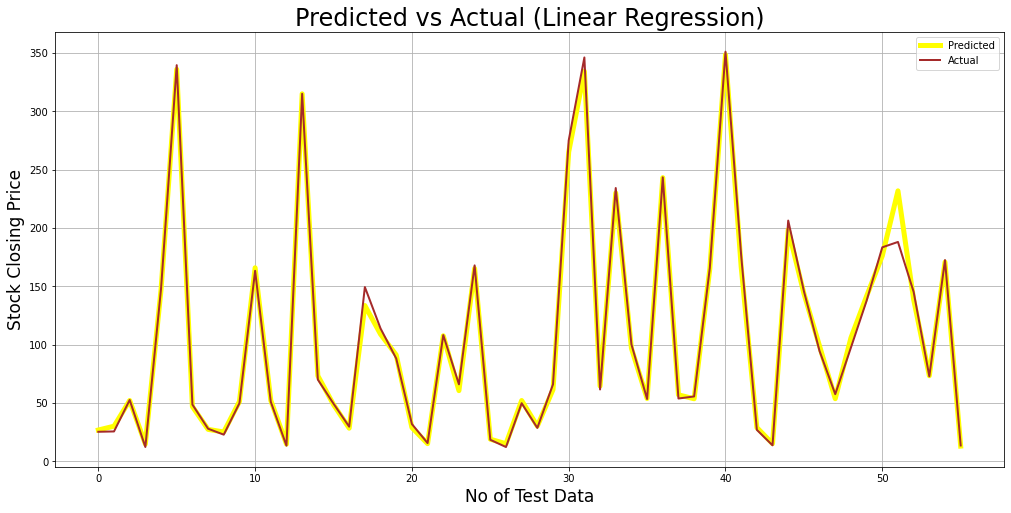

In [359]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred,color='yellow',linewidth=5)
plt.plot(np.array(y_test),color='brown',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred = Predicted values
# y_test = Actual values

In [451]:
# Inserting Linear Regression evaluation metrics into the dataframe.
eval_metric_df.loc[i,"Model_Name"]='Linear regression'
eval_metric_df.loc[i,"MAE"]=round(MAE,2)
eval_metric_df.loc[i,"MSE"]=round(MSE,2)
eval_metric_df.loc[i,"RMSE"]=round(RMSE,2)
eval_metric_df.loc[i,"MAPE"]=round(MAPE,2)

i+=1

## **2. Ridge Regression**

In [329]:
# Fitting data into Ridge Regression algorithm.
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [334]:
# Checking the training accuracy.
ridge_train_accuracy = ridge.score(x_train, y_train)*100
print(f'Training accuracy of the dataset for Ridge regression model is {ridge_train_accuracy} %.')

Training accuracy of the dataset for Ridge regression model is 99.52321298870946 %.


In [342]:
# Cross validation.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [343]:
print("Best fit alpha value :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

Best fit alpha value : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -62.476036600378386


In [351]:
# Predicted values.
y_pred_ridge = ridge_regressor.predict(x_test)
y_pred_ridge

array([ 26.81601699,  30.08912053,  52.24942635,  14.79552513,
       147.1669197 , 336.1860681 ,  47.05160407,  27.35028132,
        25.17337649,  51.30891509, 166.00440843,  52.20483135,
        14.73233079, 315.04121555,  73.32455613,  48.64767444,
        28.35111091, 133.63135072, 108.79598814,  91.1360551 ,
        28.94195913,  15.16271017, 107.6302935 ,  60.48056196,
       165.27532452,  18.97061826,  15.0696245 ,  52.09431307,
        30.2057414 ,  61.5712822 , 264.9698329 , 334.59918844,
        64.55761873, 230.20869373,  96.81652166,  53.86265754,
       243.07408384,  56.99532519,  53.68554535, 165.08917756,
       348.77193705, 166.70345655,  28.92595273,  15.13210566,
       198.56213691, 143.80926616,  98.81055759,  53.72265715,
       105.80949089, 141.68748891, 177.10105479, 231.44352082,
       138.80567859,  73.33932518, 170.66103681,  13.105769  ])

In [453]:
# Evaluation metrics.
MAE = mean_absolute_error((y_test), (y_pred_ridge))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error((y_test), (y_pred_ridge))
print("MAPE :" ,MAPE)

MAE : 3.9480298075144185
MSE : 53.387739767507455
RMSE : 7.3066914378196826
MAPE : 0.051627906622410395


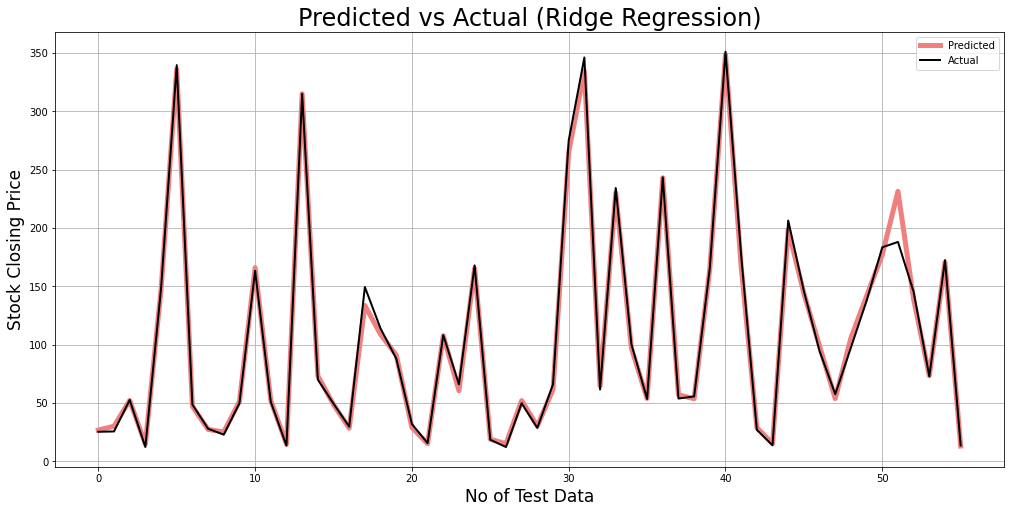

In [391]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred_ridge,color='lightcoral',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred_ridge = Predicted values
# y_test = Actual values

In [454]:
# Inserting Ridge Regression evaluation metrics into the dataframe.
eval_metric_df.loc[i,"Model_Name"]='Ridge regression'
eval_metric_df.loc[i,"MAE"]=round(MAE,2)
eval_metric_df.loc[i,"MSE"]=round(MSE,2)
eval_metric_df.loc[i,"RMSE"]=round(RMSE,2)
eval_metric_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

## **3. Lasso Regression**

In [381]:
# Fitting data into Lasso Regression algorithm.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [382]:
# Checking the training accuracy.
lasso_train_accuracy = lasso.score(x_train, y_train)*100
print(f'Training accuracy of the dataset for Lasso regression model is {lasso_train_accuracy} %.')

Training accuracy of the dataset for Lasso regression model is 99.52321298882947 %.


In [383]:
# Cross validation.
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [385]:
print("Best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -59.70267990951032


In [386]:
# Predicted values.
y_pred_lasso = lasso_regressor.predict(x_test)
y_pred_lasso

array([ 26.79893896,  30.07736572,  52.28721922,  14.79269085,
       147.23837968, 336.22071076,  47.12476911,  27.33143754,
        25.19315241,  51.3153686 , 166.03728266,  52.18389213,
        14.72129133, 315.00524838,  73.32053126,  48.65306631,
        28.33901296, 133.67355815, 108.73379641,  91.10770084,
        28.94227753,  15.16957047, 107.63085088,  60.44024219,
       165.2645306 ,  18.96149761,  15.06772369,  52.07144977,
        30.20178709,  61.60054401, 264.87795577, 334.70119355,
        64.59381752, 230.30606762,  96.77846634,  53.84838728,
       242.99928844,  56.99012169,  53.71753995, 165.10128088,
       348.81961886, 166.71335763,  28.90939597,  15.12040775,
       198.53366289, 143.78559017,  98.82853438,  53.7299689 ,
       105.78935564, 141.72106136, 177.79514188, 231.30817239,
       138.85594871,  73.31525591, 170.60799354,  13.14781932])

In [456]:
# Evaluation metrics.
MAE = mean_absolute_error((y_test), (y_pred_lasso))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error((y_test), (y_pred_lasso))
print("MAPE :" ,MAPE)

MAE : 3.928019181388511
MSE : 52.98211863960956
RMSE : 7.2788816888042325
MAPE : 0.05137703635743612


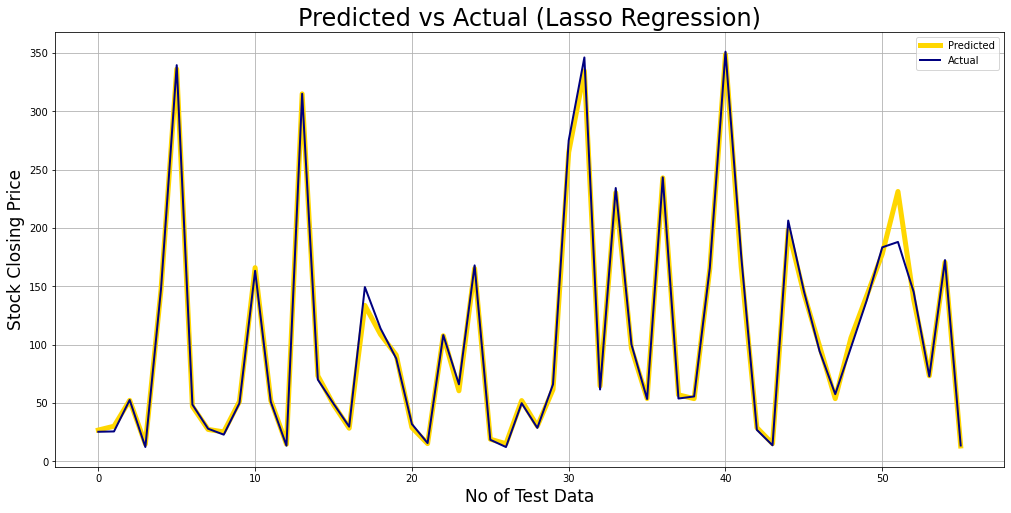

In [395]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred_lasso,color='gold',linewidth=5)
plt.plot(np.array(y_test),color='navy',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# y_pred_lasso = Predicted values
# y_test = Actual values

In [457]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metric_df.loc[i,"Model_Name"]='Lasso regression'
eval_metric_df.loc[i,"MAE"]=round(MAE,2)
eval_metric_df.loc[i,"MSE"]=round(MSE,2)
eval_metric_df.loc[i,"RMSE"]=round(RMSE,2)
eval_metric_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

## **4. KNN**

In [414]:
# Hyperparameter tuning.
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

In [403]:
# Fitting the model.
model_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [405]:
# Predicted Values.
y_pred_knn = model_knn.predict(x_test)
y_pred_knn

array([ 25.47      ,  29.10666667,  58.98      ,  15.50666667,
       161.12      , 328.86666667,  47.63      ,  25.47      ,
        26.37333333,  52.03666667, 176.62666667,  49.72666667,
        12.90333333, 312.61333333,  70.52333333,  49.72666667,
        25.93666667, 149.49      ,  94.10666667,  89.01      ,
        28.43333333,  16.70666667, 111.47      ,  60.66      ,
       164.81666667,  19.13666667,  14.88      ,  48.02333333,
        29.10666667,  65.78      , 268.39333333, 328.86666667,
        67.75      , 252.44666667,  89.01      ,  51.90333333,
       243.88666667,  53.73666667,  58.98      , 176.62666667,
       346.71666667, 176.62666667,  25.93666667,  12.90333333,
       199.11666667, 149.49      ,  95.97      ,  53.73666667,
       103.64666667, 153.23      , 235.07666667, 198.38333333,
       153.23      ,  71.48666667, 166.25333333,  16.49      ])

In [459]:
# Evaluation metrics.
MAE = mean_absolute_error((y_test), (y_pred_knn))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred_knn))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error((y_test), (y_pred_knn))
print("MAPE :" ,MAPE)

MAE : 5.570297619047614
MSE : 94.3388978174603
RMSE : 9.712821310899336
MAPE : 0.06537346498084326


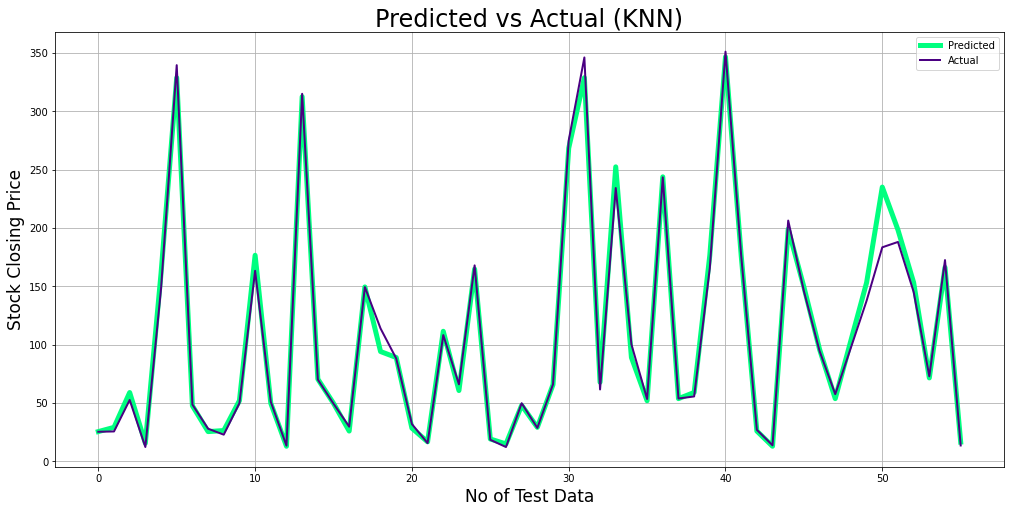

In [408]:
# Visualisation.
plt.figure(figsize=(17,8))
plt.plot(y_pred_knn,color='springgreen',linewidth=5)
plt.plot(np.array(y_test),color='indigo',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (KNN)',fontsize=24)
plt.grid()
plt.show()

# y_pred_knn = Predicted values
# y_test = Actual values

In [460]:
# Inserting KNN evaluation metrics into the dataframe.
eval_metric_df.loc[i,"Model_Name"]='KNN'
eval_metric_df.loc[i,"MAE"]=round(MAE,2)
eval_metric_df.loc[i,"MSE"]=round(MSE,2)
eval_metric_df.loc[i,"RMSE"]=round(RMSE,2)
eval_metric_df.loc[i,"MAPE"]=round(MAPE,2)

i=i+1

### **> METRICS COMPARISON**

In [462]:
# Sorting metrics by MAE.
eval_metric_df.sort_values(by=['MAE'],ascending=True,inplace=True)

In [463]:
eval_metric_df

,Model_Name,MAE,MSE,RMSE,MAPE
2,Lasso regression,3.93,52.98,7.28,0.05
1,Ridge regression,3.95,53.39,7.31,0.05
0,Linear regression,3.98,54.39,7.38,0.05
3,KNN,5.57,94.34,9.71,0.07


## **Conclusions**